### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [1]:
import numpy as np
import pandas as pd

ссылка на <a href='https://yadi.sk/d/FrA3fMcW1s4_1w'>датасет</a>

In [ ]:
data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [114]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
data.shape

(1458644, 41)

Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [41]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

data.isna().sum()

vendor_id                  0
passenger_count            0
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [38]:
#находим количество значений в колонку 'passenger_count'
x = data['passenger_count'].value_counts()
most_popular = x.index[0]

In [40]:
data['passenger_count'] = data['passenger_count'].fillna(most_popular)

In [127]:
#(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()
(data['passenger_count'].value_counts().reset_index())['passenger_count']


0    1076218
1     189262
2      70348
3      53751
4      43460
5      25543
6         57
7          3
8          1
9          1
Name: passenger_count, dtype: int64

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [43]:
new_data = data[['vendor_id','store_and_fwd_flag', 'traffic_jam', 'month_2' , 'month_3','month_4','month_5','month_6','distance_km']]

In [46]:
### Убедимся, что пропусков не осталось

new_data.head()


,vendor_id,store_and_fwd_flag,traffic_jam,month_2,month_3,month_4,month_5,month_6,distance_km
id,,,,,,,,,
id2875421,1,0,0,0,1,0,0,0,1.500479
id2377394,0,0,0,0,0,0,0,1,1.807119
id3858529,1,0,1,0,0,0,0,0,6.392080
id3504673,1,0,0,0,0,1,0,0,1.487155
id2181028,1,0,0,0,1,0,0,0,1.189925


In [59]:
new_data[new_data['distance_km'].isnull()]['distance_km'].index

Index(['id0799785', 'id3379579', 'id2067879', 'id1158195', 'id1476107',
       'id2358953', 'id3056417', 'id0045014', 'id2146569', 'id2681033',
       ...
       'id0244280', 'id1092469', 'id3185462', 'id2796154', 'id3547814',
       'id2071901', 'id2313812', 'id1489312', 'id3267199', 'id0405770'],
      dtype='object', name='id', length=145864)

In [60]:
mean_group_distance = new_data.groupby(['vendor_id','store_and_fwd_flag', 'traffic_jam', 'month_2' , 'month_3','month_4','month_5','month_6'])['distance_km'].transform('mean')

In [63]:
data['distance_km'] = data['distance_km'].fillna(mean_group_distance)

In [66]:
data.head(10).to_csv('gggg.csv', index = False, sep = ';')

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [71]:
X = data.drop('log_trip_duration', axis= 1)
y = data['log_trip_duration']

In [78]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

model = LinearRegression()
cv_results = cross_validate(model, X, y, cv = selector, scoring='neg_mean_squared_error')




MSLE на Кросс-валидации: 0.656


In [83]:
cross_val_error = np.mean(cv_results['test_score'])
print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")


MSLE на Кросс-валидации: -0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

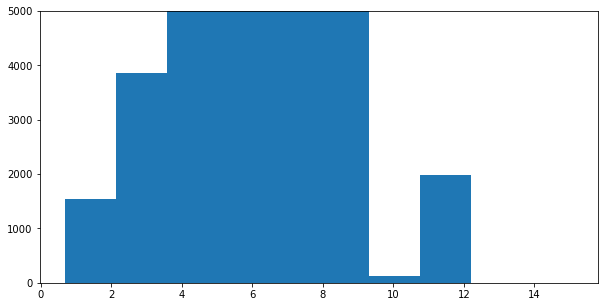

In [95]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(10, 5)

plt.hist(data['log_trip_duration'])
plt.ylim(0,5000)
plt.show()

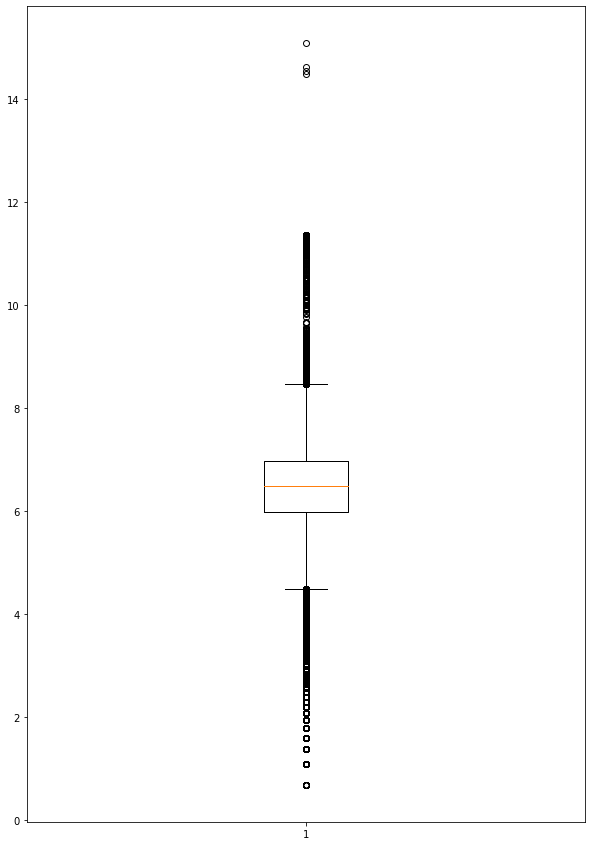

In [94]:
fig = plt.figure()
fig.set_size_inches(10,15)

plt.boxplot(data['log_trip_duration'])
plt.show()

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

[топ 99,5% значение;   топ 0,5% значение]

In [110]:
max_trip_duration = data['log_trip_duration'].quantile(0.995)
min_trip_duration = data['log_trip_duration'].quantile(0.005)

new_data = data[(data['log_trip_duration']<=max_trip_duration)&(data['log_trip_duration']>=min_trip_duration)]

Снова замерьте качество на кросс-валидации, используя старый selector

In [111]:
X_new =new_data.drop('log_trip_duration', axis = 1)
y_new = new_data['log_trip_duration']

In [112]:
new_model = LinearRegression()
new_cv_results = cross_validate(new_model, X_new,y_new, cv = selector,scoring='neg_mean_squared_error' )


In [113]:
new_cross_val_score = np.mean(new_cv_results['test_score'])
print(f"MSLE на Кросс-валидации: {round(new_cross_val_score,3)}")

MSLE на Кросс-валидации: -0.342
